In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset

pymace_df= pd.merge(mouse_df, clinical_df, on= "Mouse ID")
# Display the data table for preview
pymace_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Tumor_group = pd.DataFrame(pymace_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"])
# Convert to DataFrame

# Preview DataFrame
Tumor_group.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Tumor_stande = pymace_df.groupby(["Drug", "Timepoint"]).agg({"Tumor Volume (mm3)":"sem"})
# Convert to DataFrame
Tumor_stande.apply(pd.Series)
# Preview DataFrame
Tumor_stande.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
 #Mean Tumor Volume 
# Minor Data Munging to Re-Format the Data Frames
Tumor_groupdf= Tumor_group.pivot_table(index=['Timepoint'], columns='Drug', values='Tumor Volume (mm3)', fill_value='').rename_axis('Drug', axis=1).reset_index()
        
Tumor_groupdf1= Tumor_groupdf.set_index('Timepoint')

# Preview that Reformatting worked
Tumor_groupdf1.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Minor Data Munging to Re-Format the Data Frames
Tumor_standedf= Tumor_stande.pivot_table(index=['Timepoint'], columns='Drug', values='Tumor Volume (mm3)', fill_value='').rename_axis('Drug', axis=1).reset_index()
        
Tumor_standedf1= Tumor_standedf.set_index('Timepoint')

# Preview that Reformatting worked
Tumor_standedf1.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [6]:
 #Mean Tumor Volume 
Tumoravg_plot= Tumor_groupdf1.drop(columns = ["Zoniferol", "Stelasyn", "Ramicane", "Propriva", "Ceftamin", "Naftisol"])
Tumoravg_plot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [7]:
Tumor_error= Tumor_standedf1.drop(columns = ["Zoniferol", "Stelasyn", "Ramicane", "Propriva", "Ceftamin", "Naftisol"])
Tumor_error

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


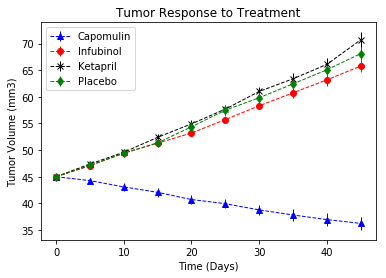

<Figure size 432x288 with 0 Axes>

In [8]:

#plot error bars

plt.errorbar(Tumoravg_plot.index, Tumoravg_plot["Capomulin"], yerr=Tumor_error["Capomulin"], marker= "^", color= "b", markersize=6, linestyle="dashed", linewidth=1, label="Capomulin")

plt.errorbar(Tumoravg_plot.index, Tumoravg_plot["Infubinol"], yerr=Tumor_error["Infubinol"], marker= "o", color= "r", markersize=6, linestyle="dashed", linewidth=1, label="Infubinol")

plt.errorbar(Tumoravg_plot.index, Tumoravg_plot["Ketapril"], yerr=Tumor_error["Ketapril"], marker= "x", color= "black", markersize=6, linestyle="dashed", linewidth=1, label="Ketapril")

plt.errorbar(Tumoravg_plot.index, Tumoravg_plot["Placebo"], yerr=Tumor_error["Placebo"], marker= "d", color= "g", markersize=6, linestyle="dashed", linewidth=1, label="Placebo")



plt.title("Tumor Response to Treatment")
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
#plt.axis('tight')
plt.legend(loc='upper left')
plt.show()

# Save the Figure
plt.savefig("data/Fig1.png") 


## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
 
Metavg_group = pymace_df.groupby(["Drug", "Timepoint"]).agg({"Metastatic Sites":"mean"})
# Convert to DataFrame
Metavg_group.apply(pd.Series)
# Preview DataFrame
Metavg_group.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Met_stande = pymace_df.groupby(["Drug", "Timepoint"]).agg({"Metastatic Sites":"sem"})
# Convert to DataFrame
Met_stande.apply(pd.Series)
# Preview DataFrame
Met_stande.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
Metavg_groupdf= Metavg_group.pivot_table(index=['Timepoint'], columns='Drug', values='Metastatic Sites', fill_value='').rename_axis('Drug', axis=1).reset_index()
        
Metavg_groupdf1= Metavg_groupdf.set_index('Timepoint')

# Preview that Reformatting worked
Metavg_groupdf1.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
Metavg_plot= Metavg_groupdf1.drop(columns = ["Zoniferol", "Stelasyn", "Ramicane", "Propriva", "Ceftamin", "Naftisol"])
Metavg_plot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [13]:
# Minor Data Munging to Re-Format the Data Frames
Met_standedf= Met_stande.pivot_table(index=['Timepoint'], columns='Drug', values='Metastatic Sites', fill_value='').rename_axis('Drug', axis=1).reset_index()
        
Met_standedf1= Met_standedf.set_index('Timepoint')

# Preview that Reformatting worked
Met_standedf1.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [14]:
Met_error= Met_standedf1.drop(columns = ["Zoniferol", "Stelasyn", "Ramicane", "Propriva", "Ceftamin", "Naftisol"])
Met_error

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


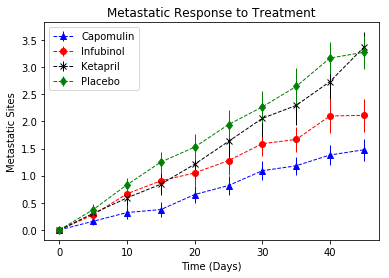

In [15]:
# Generate the Plot (with Error Bars)



#plot error bars
plt.errorbar(Metavg_plot.index, Metavg_plot["Capomulin"], yerr=Met_error["Capomulin"], marker= "^", color= "b", markersize=6, linestyle="dashed", linewidth=1, label="Capomulin")

plt.errorbar(Metavg_plot.index, Metavg_plot["Infubinol"], yerr=Met_error["Infubinol"], marker= "o", color= "r", markersize=6, linestyle="dashed", linewidth=1, label="Infubinol")

plt.errorbar(Metavg_plot.index, Metavg_plot["Ketapril"], yerr=Met_error["Ketapril"], marker= "x", color= "black", markersize=6, linestyle="dashed", linewidth=1, label="Ketapril")

plt.errorbar(Metavg_plot.index, Metavg_plot["Placebo"], yerr=Met_error["Placebo"], marker= "d", color= "g", markersize=6, linestyle="dashed", linewidth=1, label="Placebo")



plt.title("Metastatic Response to Treatment")
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Sites')
#plt.axis('tight')
plt.legend(loc='upper left')

# Save the Figure
plt.savefig("data/Fig2.png") 

plt.show()

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric) 
Mouse_ID_group = pymace_df.groupby(["Drug", "Timepoint"]).agg({"Mouse ID":"count"})
# Convert to DataFrame
Mouse_ID_group.apply(pd.Series)
# Preview DataFrame
Mouse_ID_group.head()


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [17]:
# Minor Data Munging to Re-Format the Data Frames
Mouse_ID_groupdf= Mouse_ID_group.pivot_table(index=['Timepoint'], columns=['Drug'], values='Mouse ID', fill_value='').rename_axis('Drug', axis=1).reset_index()
        
Mouse_ID_groupdf1= Mouse_ID_groupdf.set_index('Timepoint')

# Preview that Reformatting worked
Mouse_ID_groupdf1.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [18]:
Mouse_IDdf= Mouse_ID_groupdf1.drop(columns = ["Zoniferol", "Stelasyn", "Ramicane", "Propriva", "Ceftamin", "Naftisol"])
Mouse_IDdf

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


In [19]:


Mouse_IDdf_percentage = Mouse_IDdf.copy()
Mouse_IDdf_percentage1 = round(Mouse_IDdf_percentage.apply(lambda c: c / c.max() * 100, axis=0),2)
Mouse_IDdf_percentage1

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


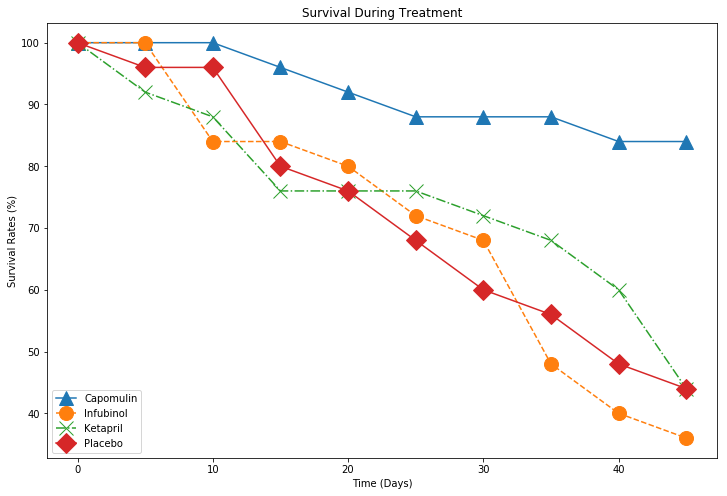

In [20]:
# Generate the Plot (Accounting for percentages)

#plot error bars
ax = Mouse_IDdf_percentage1.plot(figsize=(12,8), style=['^-', 'o--', 'x-.', 'D-'], markersize=14, legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
#plot the markers

plt.title("Survival During Treatment")
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rates (%)')
#plt.axis('tight')
plt.legend(loc="lower left")


# Save the Figure
plt.savefig("data/Fig2.png") 
plt.show()


## Summary Bar Graph

In [21]:
# Calculate the percent changes for each drug
Summarydf= (((Tumor_groupdf1.iloc[-1]-Tumor_groupdf1.iloc[0])/Tumor_groupdf1.iloc[0])*100).to_frame("% Change")
# Display the data to confirm
Summarydf

,% Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [22]:
Summarydf_plot= Summarydf.drop(index = ["Zoniferol", "Stelasyn", "Ramicane", "Propriva", "Ceftamin", "Naftisol"])
Summarydf_plot

,% Change
Drug,
Capomulin,-19.475303
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960


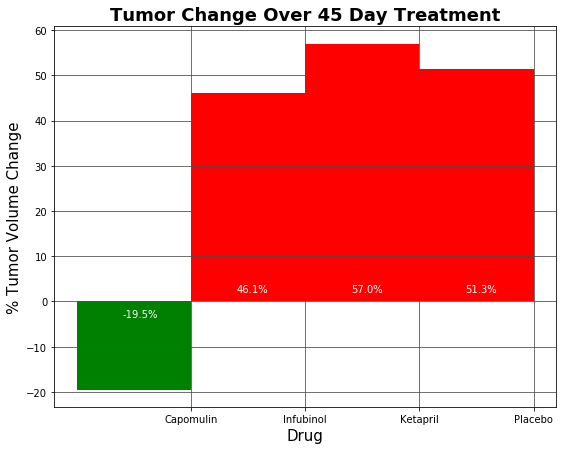

In [23]:
#plot graph
fig = plt.figure(figsize=(9,7))
#define my x & y axis
x_axis = Summarydf_plot.index
y = Summarydf_plot ["% Change"]
# Splice the data between passing and failing drugs
color = ["red" if y>= 0 else "green" for y in y]

# Orient widths. Add labels, tick marks, etc.
ax=plt.bar(x_axis, y, color=color, width = -1, align='edge', alpha = 1)

plt.title('Tumor Change Over 45 Day Treatment', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Drug', fontdict = {'fontsize': 15})
plt.ylabel('% Tumor Volume Change', fontdict = {'fontsize': 15})
plt.grid(b=False, which='both',color='0.3', linestyle='-')



#count for x coordinate location of value label
count = 0

#loops through tumor change data and places the value in the correct position based on + or - values
for r in y:
    if r < 0:
        y = -3.5
    else:
        y = 2
    plt.text(count-0.6, y, str(round(r, 1)) + '%', ha = 'left', color = 'white')
    count += 1


   



 # Save the Figure

plt.savefig("data/Fig3.png") 
# Show the Figure
fig.show()

In [ ]:
Compared to the other drugs, Capomulin consistently decrease over the 45 day treatment and average tumor size decrease overall
The mouse treated with Capomulin survived with a rate of 84% compared to the other drugs, 21 mouse survived the treatment over the 45 days period.

Overall  Capomulin shows to be the most promising drug 
